In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib
import telecontrol_parser as tp
import timeseries_functions as tf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import modelling as mdl
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import *
from sklearn.neural_network import *
from sklearn.ensemble import *
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn import tree
import sklearn
from sklearn.experimental import enable_hist_gradient_boosting
import tkinter
import plotly
import statsmodels.api as sma
from importlib import reload
import tensorflow
import keras

root = tkinter.Tk()
my_dpi = root.winfo_fpixels('1i')

In [ ]:
MLdb = mdl.MLdata('../data_sets/feats/')
MLdb.load_datasets()
MLdb.set_dataset(2,features=('lobith_feats','gemaal_feats','knmi_feats','waterstanden_feats'),mode = 'basic')
# MLdb.set_dataset(2,features=tuple())


In [ ]:

# MLdb.combine_datasets()
# print(MLdb.datadict[list(MLdb.datadict.keys())[2]])
# print(MLdb.datadict['ALL'])
# print(MLdb.get_datasets())
print(len(MLdb.dataset.columns))
MLdb.clean_columns()
print(len(MLdb.dataset.columns))
MLdb.drop_na()
print(len(MLdb.dataset.columns))
MLdb.create_train_test_split(0.8)

# MLdb.linear_regression()
MLdb.scale_data(mode = 'y',scaler = 'minmax')
y_pred_naive = MLdb.naive_predictive()
# MLdb.dataset
MLdb.vif_threshold = 20

In [ ]:
# epochs = 16
# batch_size = 255
# model  = keras.models.Sequential()
# learning_rate = 0.001

In [ ]:
# dataset_train = keras.preprocessing.timeseries.timeseries_dataset_from_array(
#     MLdb.train_x,
#     MLdb.train_y_scaled,
#     sequence_length = 6*12,
#     batch_size = batch_size
# )

In [ ]:
# dataset_val = keras.preprocessing.timeseries.timeseries_dataset_from_array(
#     MLdb.test_x,
#     MLdb.test_y_scaled,
#     sequence_length = 6*12,
#     batch_size = batch_size
# )

In [ ]:
# for batch in dataset_train.take(1):
#     inputs, targets = batch
# print(inputs.numpy().shape)
# print(targets.numpy().shape)

In [ ]:
# inputs = keras.layers.Input(shape=(inputs.shape[1],inputs.shape[2]))
# lstm_out = keras.layers.LSTM(32)(inputs)
# outputs = keras.layers.Dense(1)(lstm_out)

# model = keras.Model(inputs=inputs, outputs=outputs)
# model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
# model.summary()

In [ ]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

# history = model.fit(
#     dataset_train,
#     epochs=epochs,
#     validation_data=dataset_val,
#     callbacks=[es_callback, modelckpt_callback],
# )

In [ ]:
# def visualize_loss(history, title):
#     loss = history.history["loss"]
#     val_loss = history.history["val_loss"]
#     epochs = range(len(loss))
#     plt.figure()
#     plt.plot(epochs, loss, "b", label="Training loss")
#     plt.plot(epochs, val_loss, "r", label="Validation loss")
#     plt.title(title)
#     plt.xlabel("Epochs")
#     plt.ylabel("Loss")
#     plt.legend()
#     plt.show()


# visualize_loss(history, "Training and Validation Loss")

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(np.array(MLdb.train_x), (MLdb.train_x.shape[0], 1, MLdb.train_x.shape[1]))
testX = np.reshape(np.array(MLdb.test_x), (MLdb.test_x.shape[0], 1, MLdb.test_x.shape[1]))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
tensorflow.config.list_physical_devices('GPU')

In [ ]:


path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

In [34]:
look_back = 1
trainY = np.array(MLdb.train_y)
# create and fit the LSTM network
model = Sequential()
model.add(tensorflow.keras.layers.LSTM(16, input_shape=(1, 12)))
model.add(tensorflow.keras.layers.Dropout(0.2))
model.add(Dense(216))
model.compile(loss='mean_squared_error', optimizer=tensorflow.keras.optimizers.Adam(
    learning_rate= 0.0001
))
# model.build(input_shape = (1,1,12))
model.summary()
history = model.fit(trainX, trainY, 
    epochs=20, 
    batch_size=128, 
    verbose=2,
    validation_data=(testX,np.array(MLdb.test_y)),
    callbacks=[es_callback, modelckpt_callback]
    )

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_12 (GRU)                 (None, 16)                1440      
_________________________________________________________________
dropout_14 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 216)               3672      
Total params: 5,112
Trainable params: 5,112
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1683/1683 - 11s - loss: 8.9763 - val_loss: 2.3907

Epoch 00001: val_loss did not improve from 0.85505
Epoch 2/20
1683/1683 - 9s - loss: 5.0605 - val_loss: 2.4001

Epoch 00002: val_loss did not improve from 0.85505
Epoch 3/20
1683/1683 - 9s - loss: 3.9955 - val_loss: 1.6348

Epoch 00003: val_loss did not improve from 0.85505
Epoch 4/20
1683/1683 - 9s - loss: 2.7840 - v

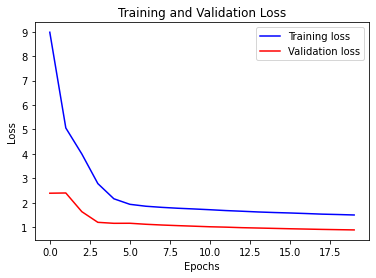

In [41]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [42]:
y_pred = pd.DataFrame(model.predict(np.reshape(np.array(MLdb.test_x),(MLdb.test_x.shape[0],1,12))))


In [43]:
# y_pred = model.predict(MLdb.test_x)
horizon = 6*36
scale = 0.75
plot = plt.figure(figsize=(scale*1920/my_dpi, scale*1080/my_dpi))
plt.plot(MLdb.test_y.iloc[:,horizon-1],label = 'true')
plt.plot(MLdb.test_y.index,y_pred.iloc[:,horizon-1], label = 'prediction')
plt.legend(fontsize = 'xx-large',loc = 'lower right')
plt.title('Model op t + '+str(horizon))
# plt.ylim(0,20)

plotly.tools.mpl_to_plotly(plot)

c:\Users\Admin\Anaconda3\envs\py36_env\lib\site-packages\plotly\matplotlylib\renderer.py:612: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [44]:
naive = MLdb.naive_predictive()

<Figure size 432x288 with 0 Axes>

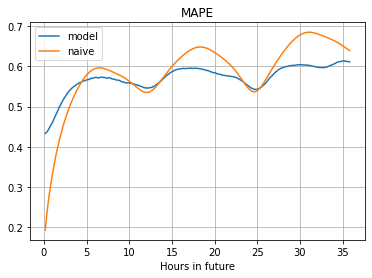

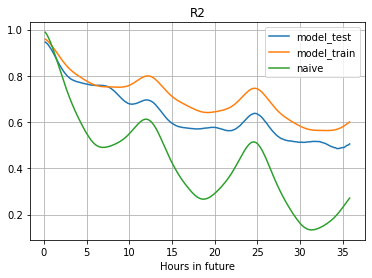

<Figure size 432x288 with 0 Axes>

In [45]:
mape_list = []
R2_list = []
R2_train_list = []
mape_list_naive = []
R2_list_naive = []

# y_pred_train = model.predict(MLdb.train_x)
y_pred_train = pd.DataFrame(model.predict(np.reshape(np.array(MLdb.train_x),(MLdb.train_x.shape[0],1,12))))

for i in range(0,MLdb.test_y.shape[1]-1):
    test_y = MLdb.test_y.iloc[:,i].values
    train_y = MLdb.train_y.iloc[:,i].values
    pred_y = y_pred.iloc[:,i]
    pred_y_train = y_pred_train.iloc[:,1]
    pred_y_naive = y_pred_naive.iloc[:,i]
    mape_list.append(mape(test_y,pred_y)**(1/2))
    R2_list.append(r2_score(test_y,pred_y))
    mape_list_naive.append(mape(test_y,pred_y_naive)**(1/2))
    R2_list_naive.append(r2_score(test_y,pred_y_naive))
    R2_train_list.append(r2_score(train_y,pred_y_train))

R2_list = np.array(R2_list).clip(min=0)


x_bereik = [(i*10+10)/60 for i in range(len(R2_list))]
plt.plot(x_bereik,mape_list,label = 'model')
plt.plot(x_bereik,mape_list_naive,label = 'naive')
plt.title('MAPE')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()
plt.plot(x_bereik,R2_list,label = 'model_test')
plt.plot(x_bereik,R2_train_list,label ='model_train')
plt.plot(x_bereik,R2_list_naive, label = 'naive')
plt.title('R2')
plt.xlabel('Hours in future')
plt.legend()
plt.grid()
plt.figure()
